In [3]:
import os.path
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import joblib
import DER
import gc
from IPython.display import display
plt.style.use("ggplot")

In [4]:
s = joblib.load("results/r_reg_reb_26(PV)_sun_4.gz")

C:\Users\vtt513\AppData\Local\Temp\ipykernel_27968\1037399478.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp = (tmp - tmp[0]) / tmp[0]


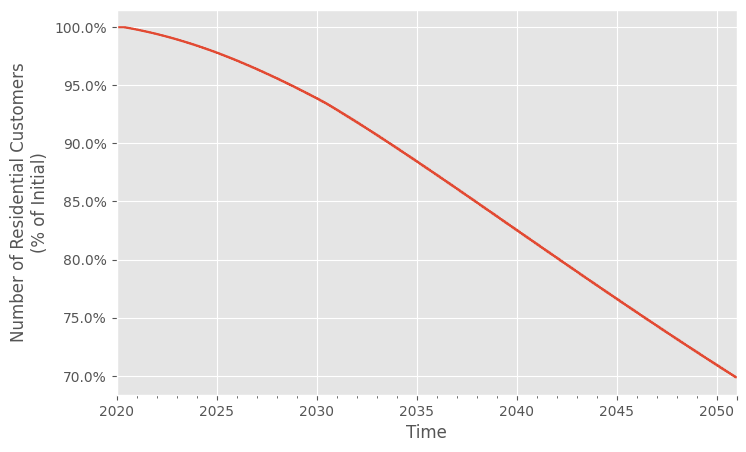

In [5]:
# % Total Number of Customers
tmp = pd.DataFrame(
    {l.name: l.number_of_active_customers for l in s.lses if "Residential" in l.name},
    index=s.time
).resample('d').mean()
tmp = tmp.T.sum().T
tmp = (tmp - tmp[0]) / tmp[0]
tmp = tmp+1
tmp = tmp*100
plt.figure(figsize=(8,5), dpi=100)
tmp.plot(ax=plt.gca())
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.ylabel("Number of Residential Customers\n(% of Initial)")
plt.xlabel("Time")
plt.show()

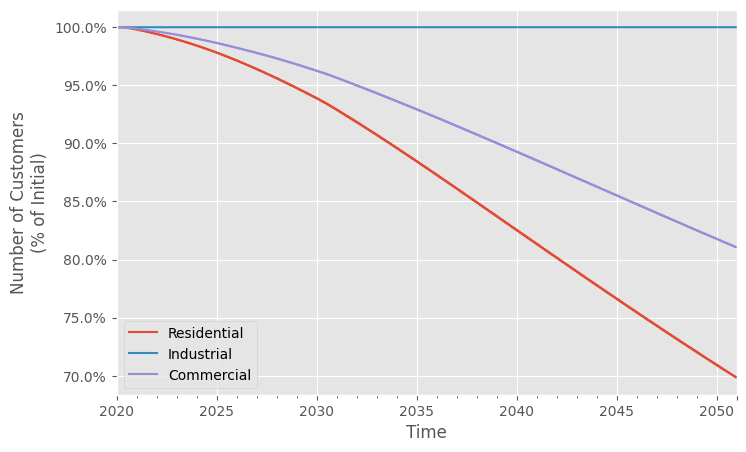

In [6]:
# % Total Number of Customers
tmp = pd.DataFrame({
    "Residential": pd.DataFrame(
        {l.name: l.number_of_active_customers for l in s.lses if "Residential" in l.name},
        index=s.time
    ).resample('d').mean().T.sum().T,
    "Industrial": pd.DataFrame(
        {l.name: l.number_of_active_customers for l in s.lses if "Industrial" in l.name},
        index=s.time
    ).resample('d').mean().T.sum().T,
    "Commercial": pd.DataFrame(
        {l.name: l.number_of_active_customers for l in s.lses if "Commercial" in l.name},
        index=s.time
    ).resample('d').mean().T.sum().T,
})

tmp = (tmp - tmp.iloc[0]) / tmp.iloc[0]
tmp = tmp+1
tmp = tmp*100
plt.figure(figsize=(8,5), dpi=100)
tmp.plot(ax=plt.gca())
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.ylabel("Number of Customers\n(% of Initial)")
plt.xlabel("Time")
plt.show()

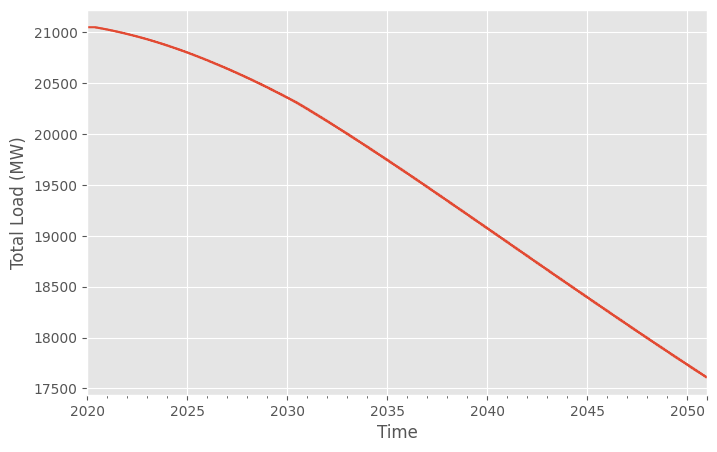

In [7]:
# Total Load
tmp = pd.DataFrame(
    {g.name: g.generation for g in s.generators},
    index=s.time
)
tmp = tmp.resample('d').mean()
tmp = tmp.T.sum().T
plt.figure(figsize=(8,5), dpi=100)
tmp.plot(ax=plt.gca())
plt.ylabel("Total Load (MW)")
plt.xlabel("Time")
plt.show()

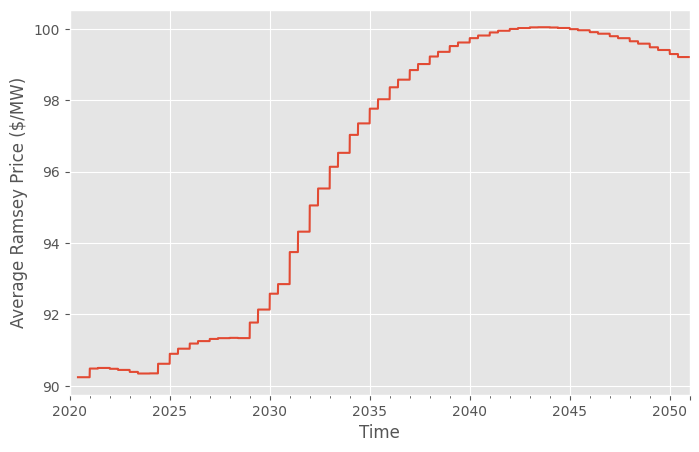

In [8]:
# Average Ramsey Price
tmp = pd.DataFrame(
    {l.name: l.ramsey_price for l in s.lses if "Residential" in l.name},
    index=s.time
).resample('d').mean()
tmp = tmp.T.mean().T
plt.figure(figsize=(8,5), dpi=100)
tmp.plot(ax=plt.gca())
plt.ylabel("Average Ramsey Price ($/MW)")
plt.xlabel("Time")
plt.show()

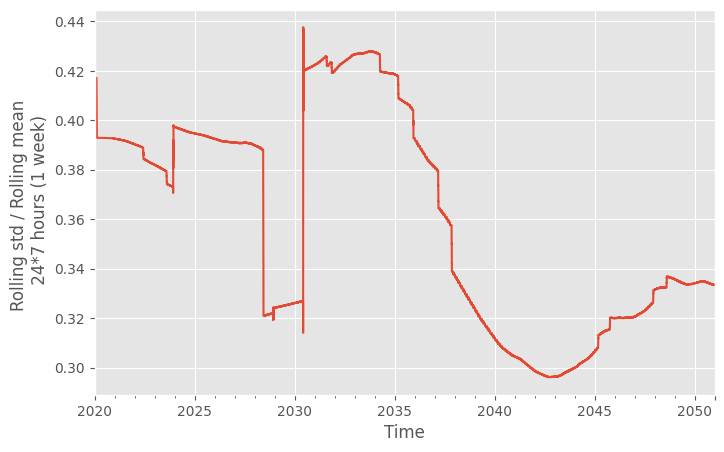

In [9]:
# Coefficient of variation
tmp = (
    pd.DataFrame({l.name: l.lmp for l in s.lses if "Residential" in l.name}, index=s.time)
    * pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time)
).sum(axis=1) / pd.DataFrame({l.name: l.demand for l in s.lses if "Residential" in l.name}, index=s.time).sum(axis=1)

plt.figure(figsize=(8,5), dpi=100)
ax = plt.gca()
(tmp.rolling(24*7).std() / tmp.rolling(24*6).mean()).plot(ax=ax)
plt.xlabel("Time")
plt.ylabel("Rolling std / Rolling mean \n 24*7 hours (1 week)")
plt.show()